# Load modules

In [14]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 87 GB / percent used: 30.7 %


# Load model data

In [15]:
# Define period
period = slice('1981','2014')

# Define zone
latlim=(-90,90)
lonlim=(0,360)

# Model
institute = 'IPSL'
model = 'IPSL-CM6A-LR'

# Check the differences between ERA-Interim and model for Near-Surface Air Temperature

## Load first member

In [16]:
realization = 'r1i1p1f1'
var = 'tas'
table = 'Amon'

# Load historical
tas = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', 
    combine='by_coords'
).sel(time=period)[var]-273.15

# ERA-Interim
tas_era = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/*/t2.*.asmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).t2.sel(time=period).load()-273.15

## Regrid

In [17]:
regridder = xe.Regridder(tas_era, tas, 'bilinear', periodic=True, reuse_weights=True)
tas_era_regrid = regridder(tas_era)

Reuse existing file: bilinear_241x480_143x144_peri.nc


## Select zone

In [18]:
tas = tas.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).load()
tas_era_regrid = tas_era_regrid.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).load()

## Compute clim

In [19]:
tas_clim = tas.mean('time')
tas_era_regrid_clim = tas_era_regrid.mean('time')

In [20]:
tas_bias = tas_clim-tas_era_regrid_clim

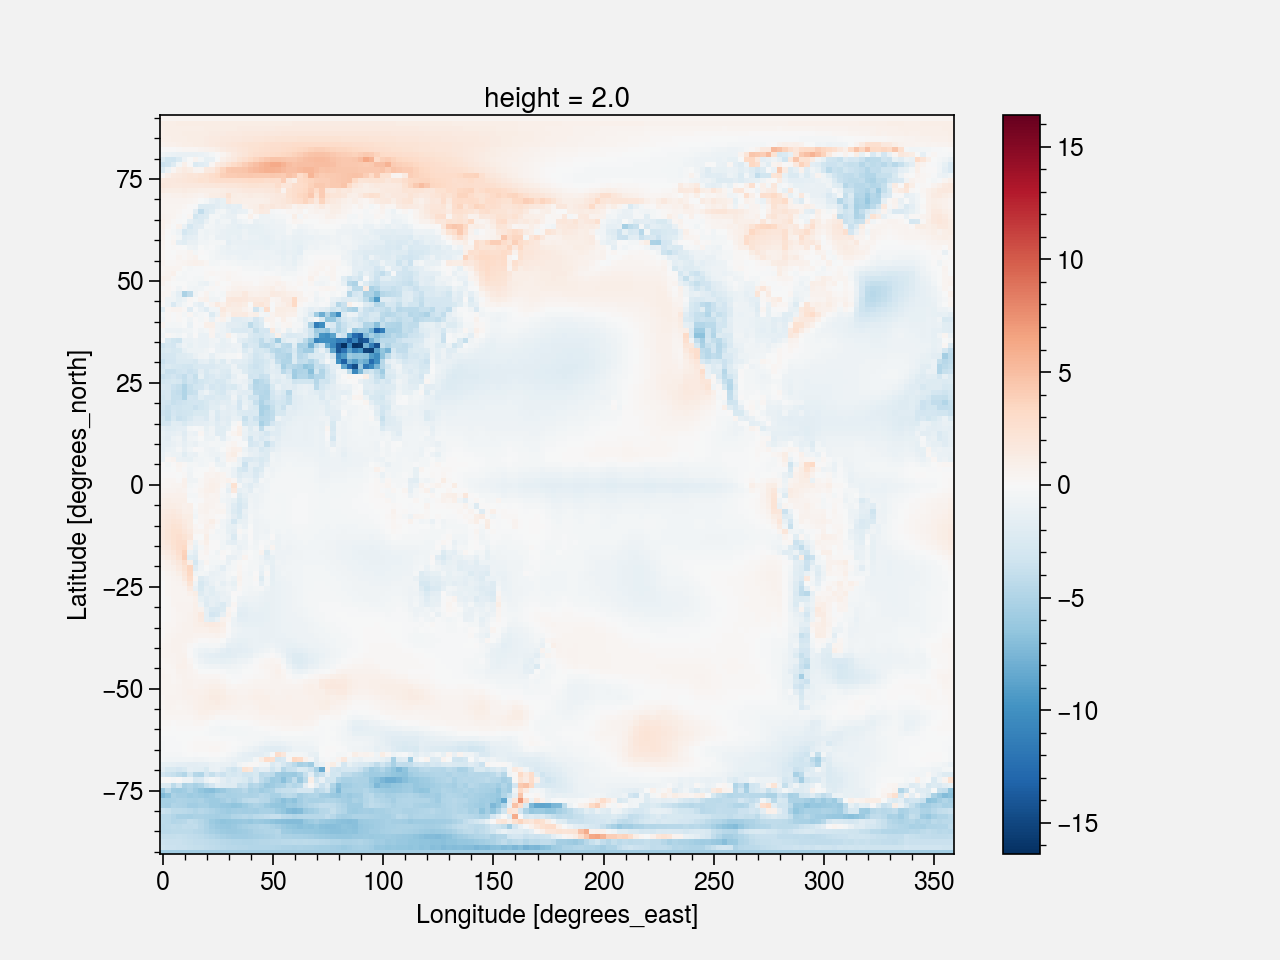

In [21]:
tas_bias.plot()

In [22]:
tas_bias.max()

<xarray.DataArray ()>
array(7.25578407)
Coordinates:
    height   float64 2.0

In [23]:
tas_bias.min()

<xarray.DataArray ()>
array(-16.39639211)
Coordinates:
    height   float64 2.0

In [24]:
tas.lon.values

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
       112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
       135. , 137.5, 140. , 142.5, 145. , 147.5, 150. , 152.5, 155. ,
       157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
       180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ,
       202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. ,
       247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5,
       270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5, 290. ,
       292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. , 312.5,
       315. , 317.5,

In [25]:
tas.lat.values

array([-90.       , -88.73239  , -87.46479  , -86.19718  , -84.92958  ,
       -83.66197  , -82.39436  , -81.12676  , -79.85915  , -78.59155  ,
       -77.323944 , -76.056335 , -74.788734 , -73.521126 , -72.253525 ,
       -70.985916 , -69.71831  , -68.45071  , -67.1831   , -65.91549  ,
       -64.64789  , -63.380283 , -62.112675 , -60.84507  , -59.577465 ,
       -58.30986  , -57.042255 , -55.774647 , -54.507042 , -53.239437 ,
       -51.971832 , -50.704224 , -49.43662  , -48.169014 , -46.90141  ,
       -45.633804 , -44.366196 , -43.09859  , -41.830986 , -40.56338  ,
       -39.295776 , -38.028168 , -36.760563 , -35.492958 , -34.225353 ,
       -32.957745 , -31.690142 , -30.422535 , -29.15493  , -27.887323 ,
       -26.619719 , -25.352112 , -24.084507 , -22.816902 , -21.549295 ,
       -20.28169  , -19.014084 , -17.746479 , -16.478872 , -15.211267 ,
       -13.943662 , -12.676056 , -11.408451 , -10.140845 ,  -8.8732395,
        -7.6056337,  -6.338028 ,  -5.0704226,  -3.8028169,  -2.5

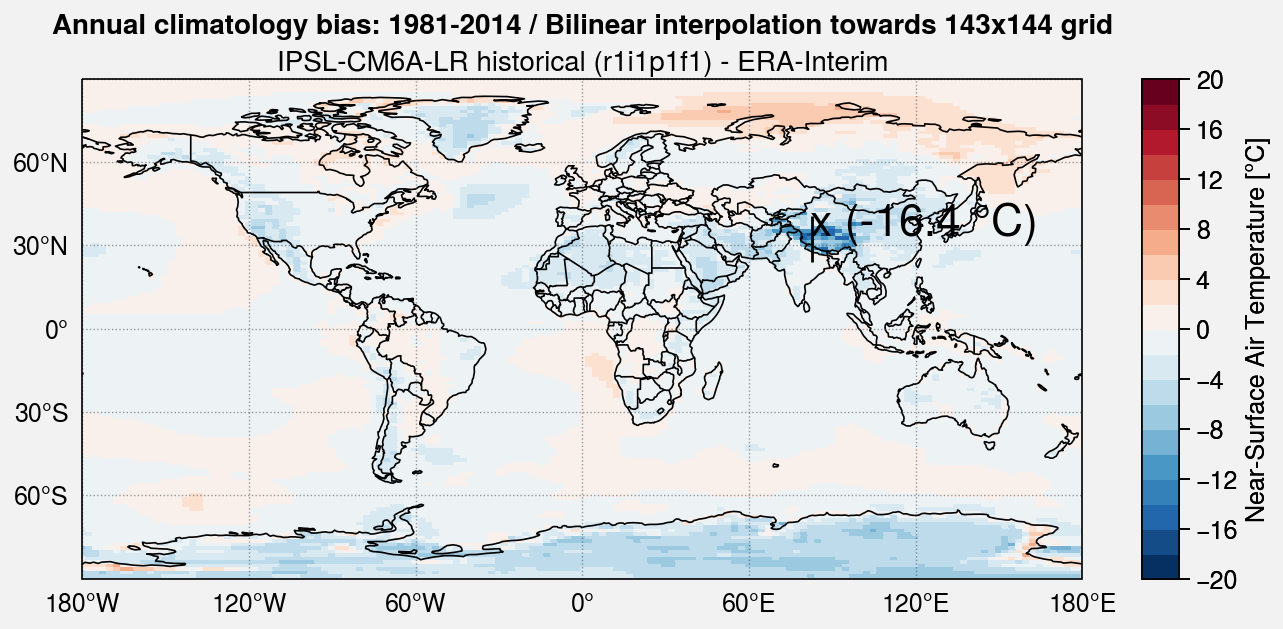

In [41]:
import matplotlib.patches as mpatches
import cartopy.crs as ccrs

dx=2.5
dy=1.2676

f, axs = plot.subplots(proj='cyl', ncols=1, nrows=1, axwidth=5)

m = axs[0].pcolormesh(tas_bias, cmap='RdBu_r', levels=plot.arange(-20,20,2))
axs[0].format(title='IPSL-CM6A-LR historical (r1i1p1f1) - ERA-Interim')

f.colorbar(m, label='Near-Surface Air Temperature [°C]')

# Add boxes
# for ax in axs:
#     u.plot_zones_IPSL_CM6A_LR(ax)
    
axs[0].add_patch(mpatches.Rectangle(
    xy=[82.5, 24.084507], width=0, height=40.56338-24.084507,
    transform=ccrs.PlateCarree(), fill=False
))
axs[0].text(82.5-dx/4, 34.225353-dy/2, 'x (-16.4 °C)', fontsize=16, 
#             horizontalalignment='center', verticalalignment='center'
           )

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Annual climatology bias: 1981-2014 / Bilinear interpolation towards 143x144 grid",
    lonlines=60, latlines=30, abc=False, latlim=latlim, lonlim=lonlim
)

var = 'ta'
# f.save('img/'+var+'/tas_IPSL_CMIP6-ERAI_bias_global.png')
# f.save('img/'+var+'/tas_IPSL_CMIP6-ERAI_bias_global.pdf')

In [27]:
tas_bias.sel(lat=34.225353, lon=82.5)

<xarray.DataArray ()>
array(-16.39639211)
Coordinates:
    lat      float32 34.225353
    lon      float32 82.5
    height   float64 2.0

In [28]:
tas_bias.sel(lat=30.422535, lon=82.5)

<xarray.DataArray ()>
array(-13.37309474)
Coordinates:
    lat      float32 30.422535
    lon      float32 82.5
    height   float64 2.0

# Load surface pressure for masking ERA-Interim
http://clipc-services.ceda.ac.uk/dreq/u/8c9504d28596e05586c8e193082ac617.html

In [29]:
realization = 'r1i1p1f1'
var = 'ps'
table = 'Amon'

# Load historical
ps = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', 
    combine='by_coords'
).sel(time=period)[var]

# ERA-Interim
ps_era = xr.open_mfdataset(
    "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",
    combine='by_coords', parallel=True
).sp.sel(time=period).load()

In [30]:
ps_era_regrid = regridder(ps_era)

ps = ps.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).load()
ps_era_regrid = ps_era_regrid.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).load()

# Get the minimum pressure (finally not used)
ps_min = ps.min('time')
ps_era_regrid_min = ps_era_regrid.min('time')

# Load Air Temperature

In [31]:
var ='ta'

ta = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords', parallel=True
).sel(time=period)[var].load()-273.15

ta_era = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/ta.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).ta.sel(time=period).load()-273.15

## Regrid horizontal

In [32]:
# Regrid horizontal
ta_era_regrid = regridder(ta_era)

## Select zone

In [33]:
ta = ta.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).load()
ta_era_regrid = ta_era_regrid.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).load()

## Mask vertical values > ps

In [34]:
ta_era_regrid_masked = ta_era_regrid.where(ta_era_regrid.level <= ps_era_regrid/100)

## Regrid vertical

In [35]:
ta_era_regrid_masked_v = ta_era_regrid_masked.interp(level=(ta.plev.values/100), method='linear')

## Compute climatologie

In [36]:
ta_clim = ta.mean('time', skipna=False).load()
ta_era_regrid_masked_clim = ta_era_regrid_masked.mean('time', skipna=False).load()
ta_era_regrid_masked_v_clim = ta_era_regrid_masked_v.mean('time', skipna=False).load()

ta_bias = ta_clim-ta_era_regrid_masked_v_clim.values

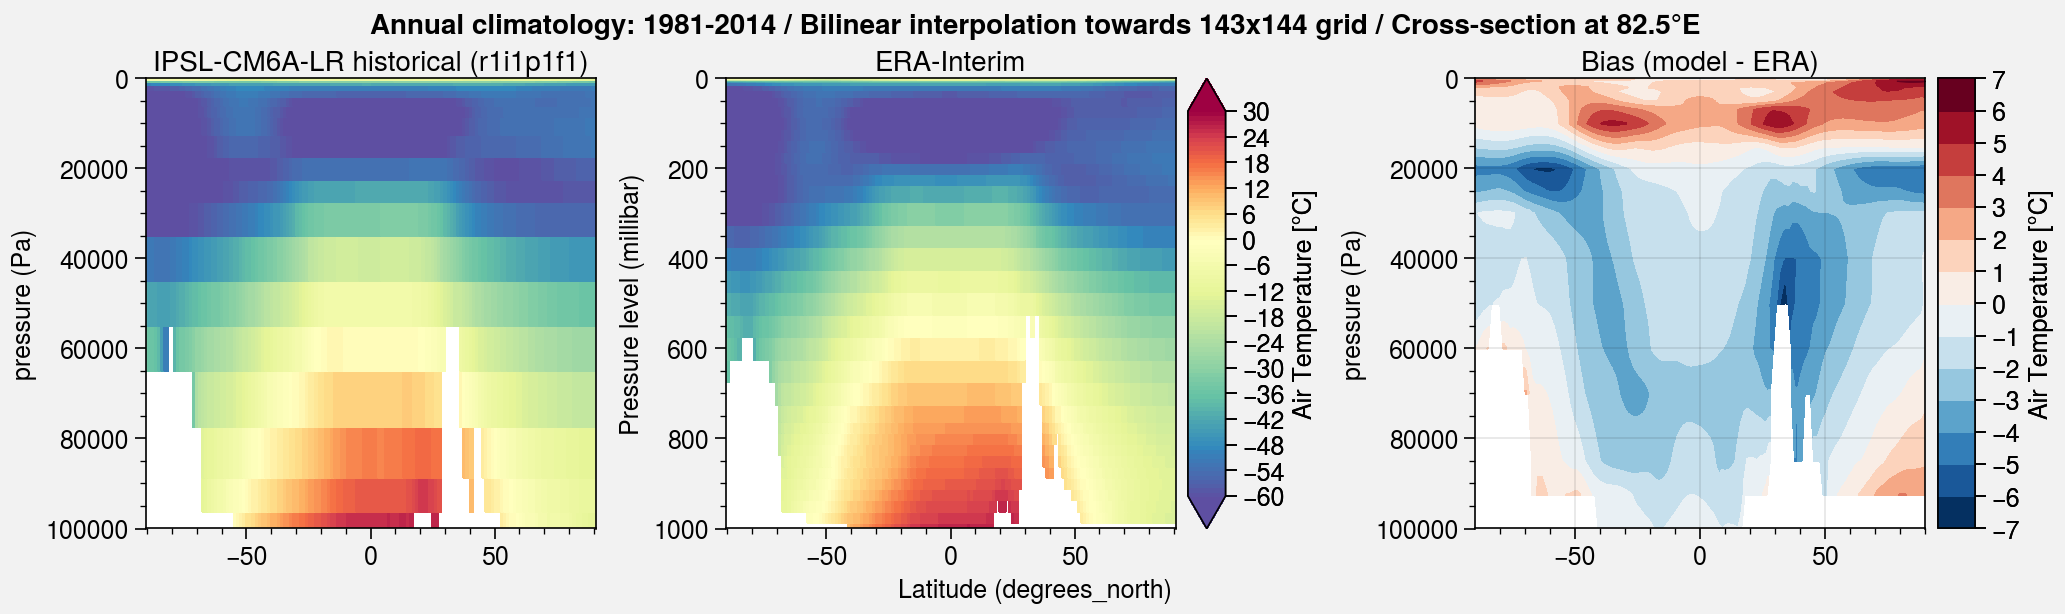

In [42]:
#Check colorbars 
levels = plot.arange(-60,30,1)
extend='both'
cmap='Spectral'

f, axs = plot.subplots(nrows=1, ncols=3, sharey=0)

# Model
m1 = axs[0].pcolormesh(ta_clim.sel(lon=82.5), cmap=cmap, levels=levels, norm='midpoint', extend=extend)
axs[0].format(ylim=(100000,0), title='IPSL-CM6A-LR historical (r1i1p1f1)')

# ERA-Interim
axs[1].pcolormesh(ta_era_regrid_masked_clim.sel(lon=82.5), cmap=cmap, levels=levels, norm='midpoint', extend=extend)
axs[1].format(ylim=(1000,0), title='ERA-Interim')
axs[1].colorbar(m1, label='Air Temperature [°C]')

# Bias
m2 = axs[2].contourf(ta_bias.sel(lon=82.5), cmap='BuRd', levels=plot.arange(-7,7,1))
axs[2].format(ylim=(100000,0), title='Bias (model - ERA)')
axs[2].colorbar(m2, label='Air Temperature [°C]')


axs.format(
    suptitle="Annual climatology: 1981-2014 / Bilinear interpolation towards 143x144 grid / Cross-section at 82.5°E"
)

# f.save('img/ta/slice_lon_82_5_ta_pcolormesh_global.png')
# f.save('img/ta/slice_lon_82_5_ta_pcolormesh_global.pdf')

In [38]:
ta_bias.lat

<xarray.DataArray 'lat' (lat: 143)>
array([-90.      , -88.73239 , -87.46479 , -86.19718 , -84.92958 , -83.66197 ,
       -82.39436 , -81.12676 , -79.85915 , -78.59155 , -77.323944, -76.056335,
       -74.788734, -73.521126, -72.253525, -70.985916, -69.71831 , -68.45071 ,
       -67.1831  , -65.91549 , -64.64789 , -63.380283, -62.112675, -60.84507 ,
       -59.577465, -58.30986 , -57.042255, -55.774647, -54.507042, -53.239437,
       -51.971832, -50.704224, -49.43662 , -48.169014, -46.90141 , -45.633804,
       -44.366196, -43.09859 , -41.830986, -40.56338 , -39.295776, -38.028168,
       -36.760563, -35.492958, -34.225353, -32.957745, -31.690142, -30.422535,
       -29.15493 , -27.887323, -26.619719, -25.352112, -24.084507, -22.816902,
       -21.549295, -20.28169 , -19.014084, -17.746479, -16.478872, -15.211267,
       -13.943662, -12.676056, -11.408451, -10.140845,  -8.87324 ,  -7.605634,
        -6.338028,  -5.070423,  -3.802817,  -2.535211,  -1.267606,   0.      ,
         1.267606,   2.535211,   3.802817,   5.070423,   6.338028,   7.605634,
         8.87324 ,  10.140845,  11.408451,  12.676056,  13.943662,  15.211267,
        16.478872,  17.746479,  19.014084,  20.28169 ,  21.549295,  22.816902,
        24.084507,  25.352112,  26.619719,  27.887323,  29.15493 ,  30.422535,
        31.690142,  32.957745,  34.225353,  35.492958,  36.760563,  38.028168,
        39.295776,  40.56338 ,  41.830986,  43.09859 ,  44.366196,  45.633804,
        46.90141 ,  48.169014,  49.43662 ,  50.704224,  51.971832,  53.239437,
        54.507042,  55.774647,  57.042255,  58.30986 ,  59.577465,  60.84507 ,
        62.112675,  63.380283,  64.64789 ,  65.91549 ,  67.1831  ,  68.45071 ,
        69.71831 ,  70.985916,  72.253525,  73.521126,  74.788734,  76.056335,
        77.323944,  78.59155 ,  79.85915 ,  81.12676 ,  82.39436 ,  83.66197 ,
        84.92958 ,  86.19718 ,  87.46479 ,  88.73239 ,  90.      ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
Attributes:
    axis:           Y
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

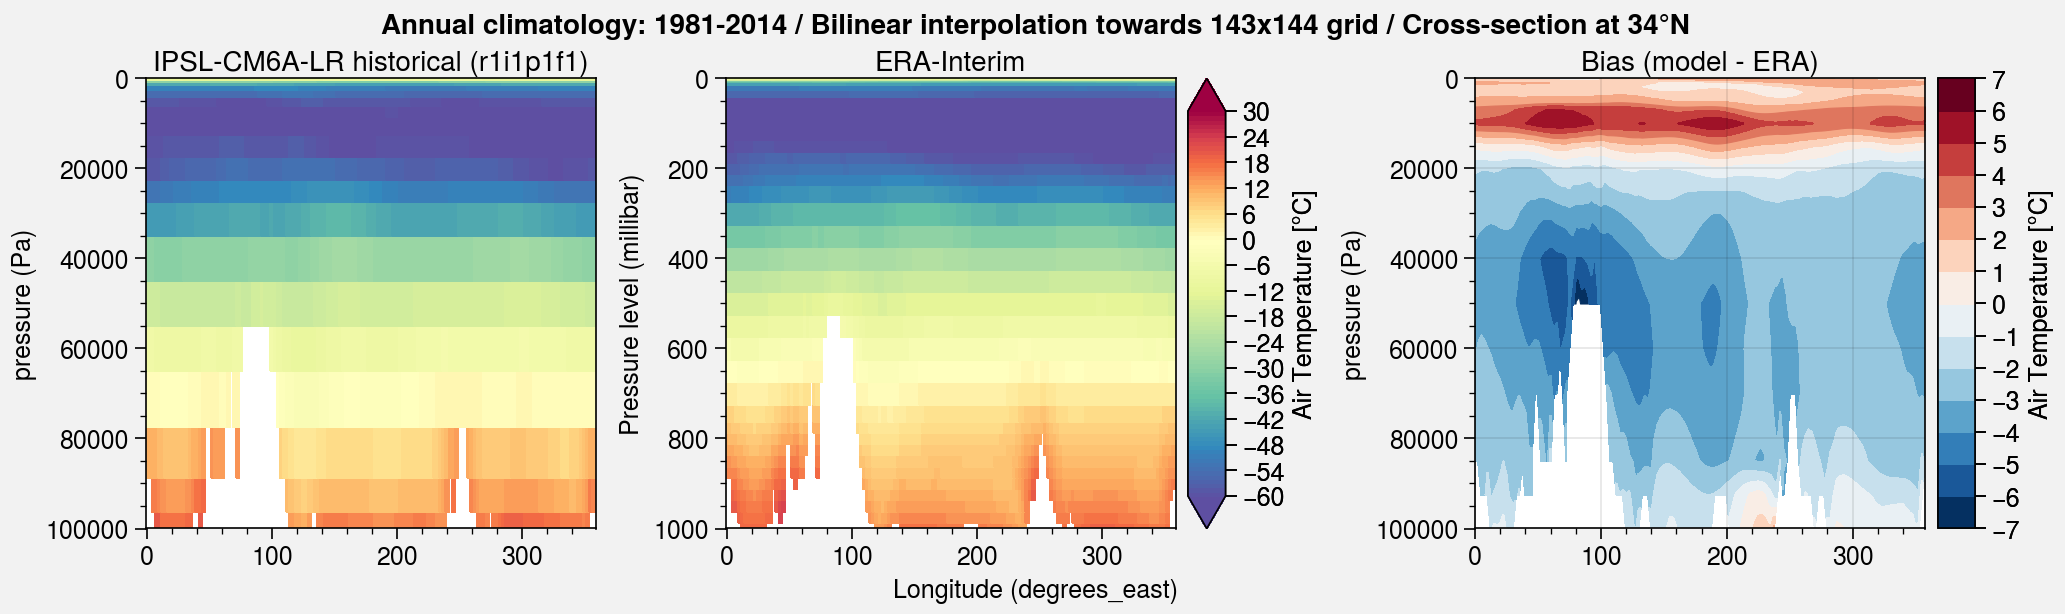

In [43]:
#Check colorbars 
levels = plot.arange(-60,30,1)
extend='both'
cmap='Spectral'

f, axs = plot.subplots(nrows=1, ncols=3, sharey=0)

# Model
m1 = axs[0].pcolormesh(ta_clim.sel(lat=34.225353), cmap=cmap, levels=levels, norm='midpoint', extend=extend)
axs[0].format(ylim=(100000,0), title='IPSL-CM6A-LR historical (r1i1p1f1)')

# ERA-Interim
axs[1].pcolormesh(ta_era_regrid_masked_clim.sel(lat=34.225353), cmap=cmap, levels=levels, norm='midpoint', extend=extend)
axs[1].format(ylim=(1000,0), title='ERA-Interim')
axs[1].colorbar(m1, label='Air Temperature [°C]')

# Bias
m2 = axs[2].contourf(ta_bias.sel(lat=34.225353), cmap='BuRd', levels=plot.arange(-7,7,1))
axs[2].format(ylim=(100000,0), title='Bias (model - ERA)')
axs[2].colorbar(m2, label='Air Temperature [°C]')


axs.format(
    suptitle="Annual climatology: 1981-2014 / Bilinear interpolation towards 143x144 grid / Cross-section at 34°N"
)

# f.save('img/ta/slice_lat_34_ta_pcolormesh_global.png')
# f.save('img/ta/slice_lat_34_ta_pcolormesh_global.pdf')

## Differences

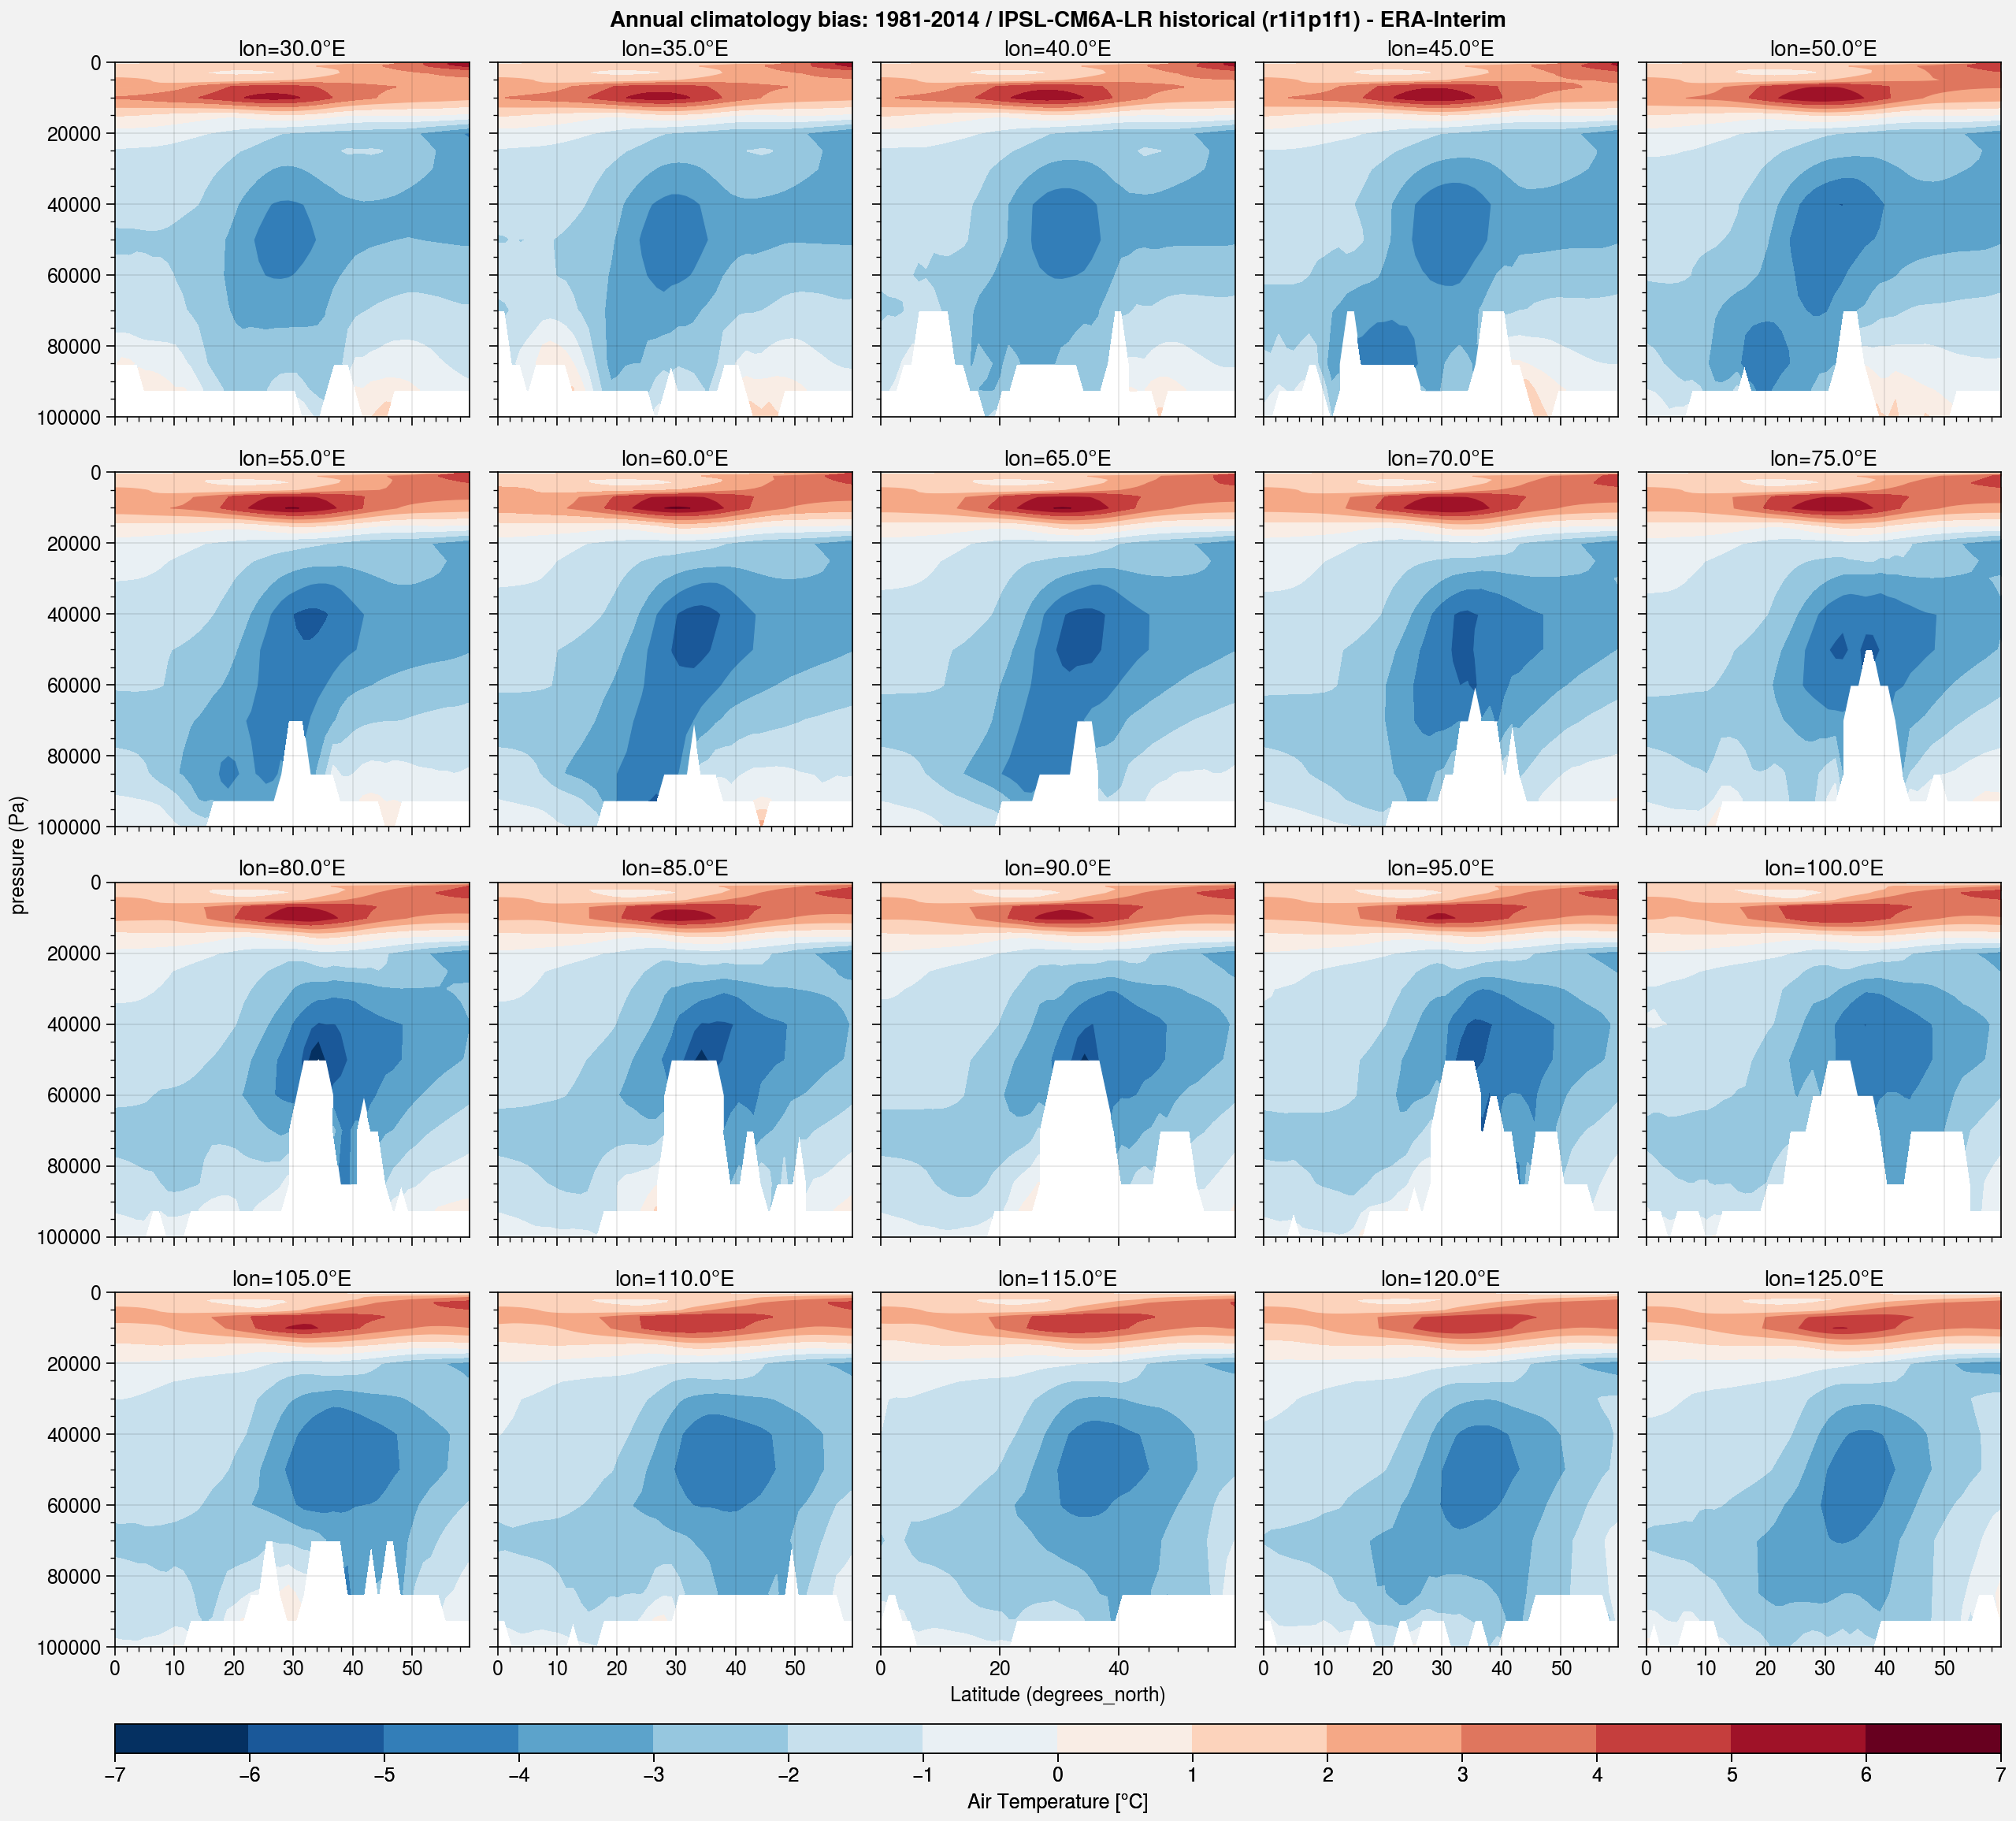

In [58]:
#Check colorbars 
levels = plot.arange(-60,30,1)
extend='both'
cmap='Spectral'

f, axs = plot.subplots(nrows=4, ncols=5)

for i, ax in enumerate(axs):
    m = ax.contourf(ta_bias[:,:,0:-1:2].isel(lon=i), cmap='BuRd', levels=plot.arange(-7,7,1))
    ax.format(ylim=(100000,0), title='lon='+str(ta_bias[:,:,0:-1:2].isel(lon=i).lon.values)+'°E')

f.colorbar(m2, label='Air Temperature [°C]', loc='b')


axs.format(
    suptitle="Annual climatology bias: 1981-2014 / IPSL-CM6A-LR historical (r1i1p1f1) - ERA-Interim"
)

# f.save('img/ta/slices_lon_ta_pcolormesh_ext.png')
# f.save('img/ta/slices_lon_ta_pcolormesh_ext.pdf')

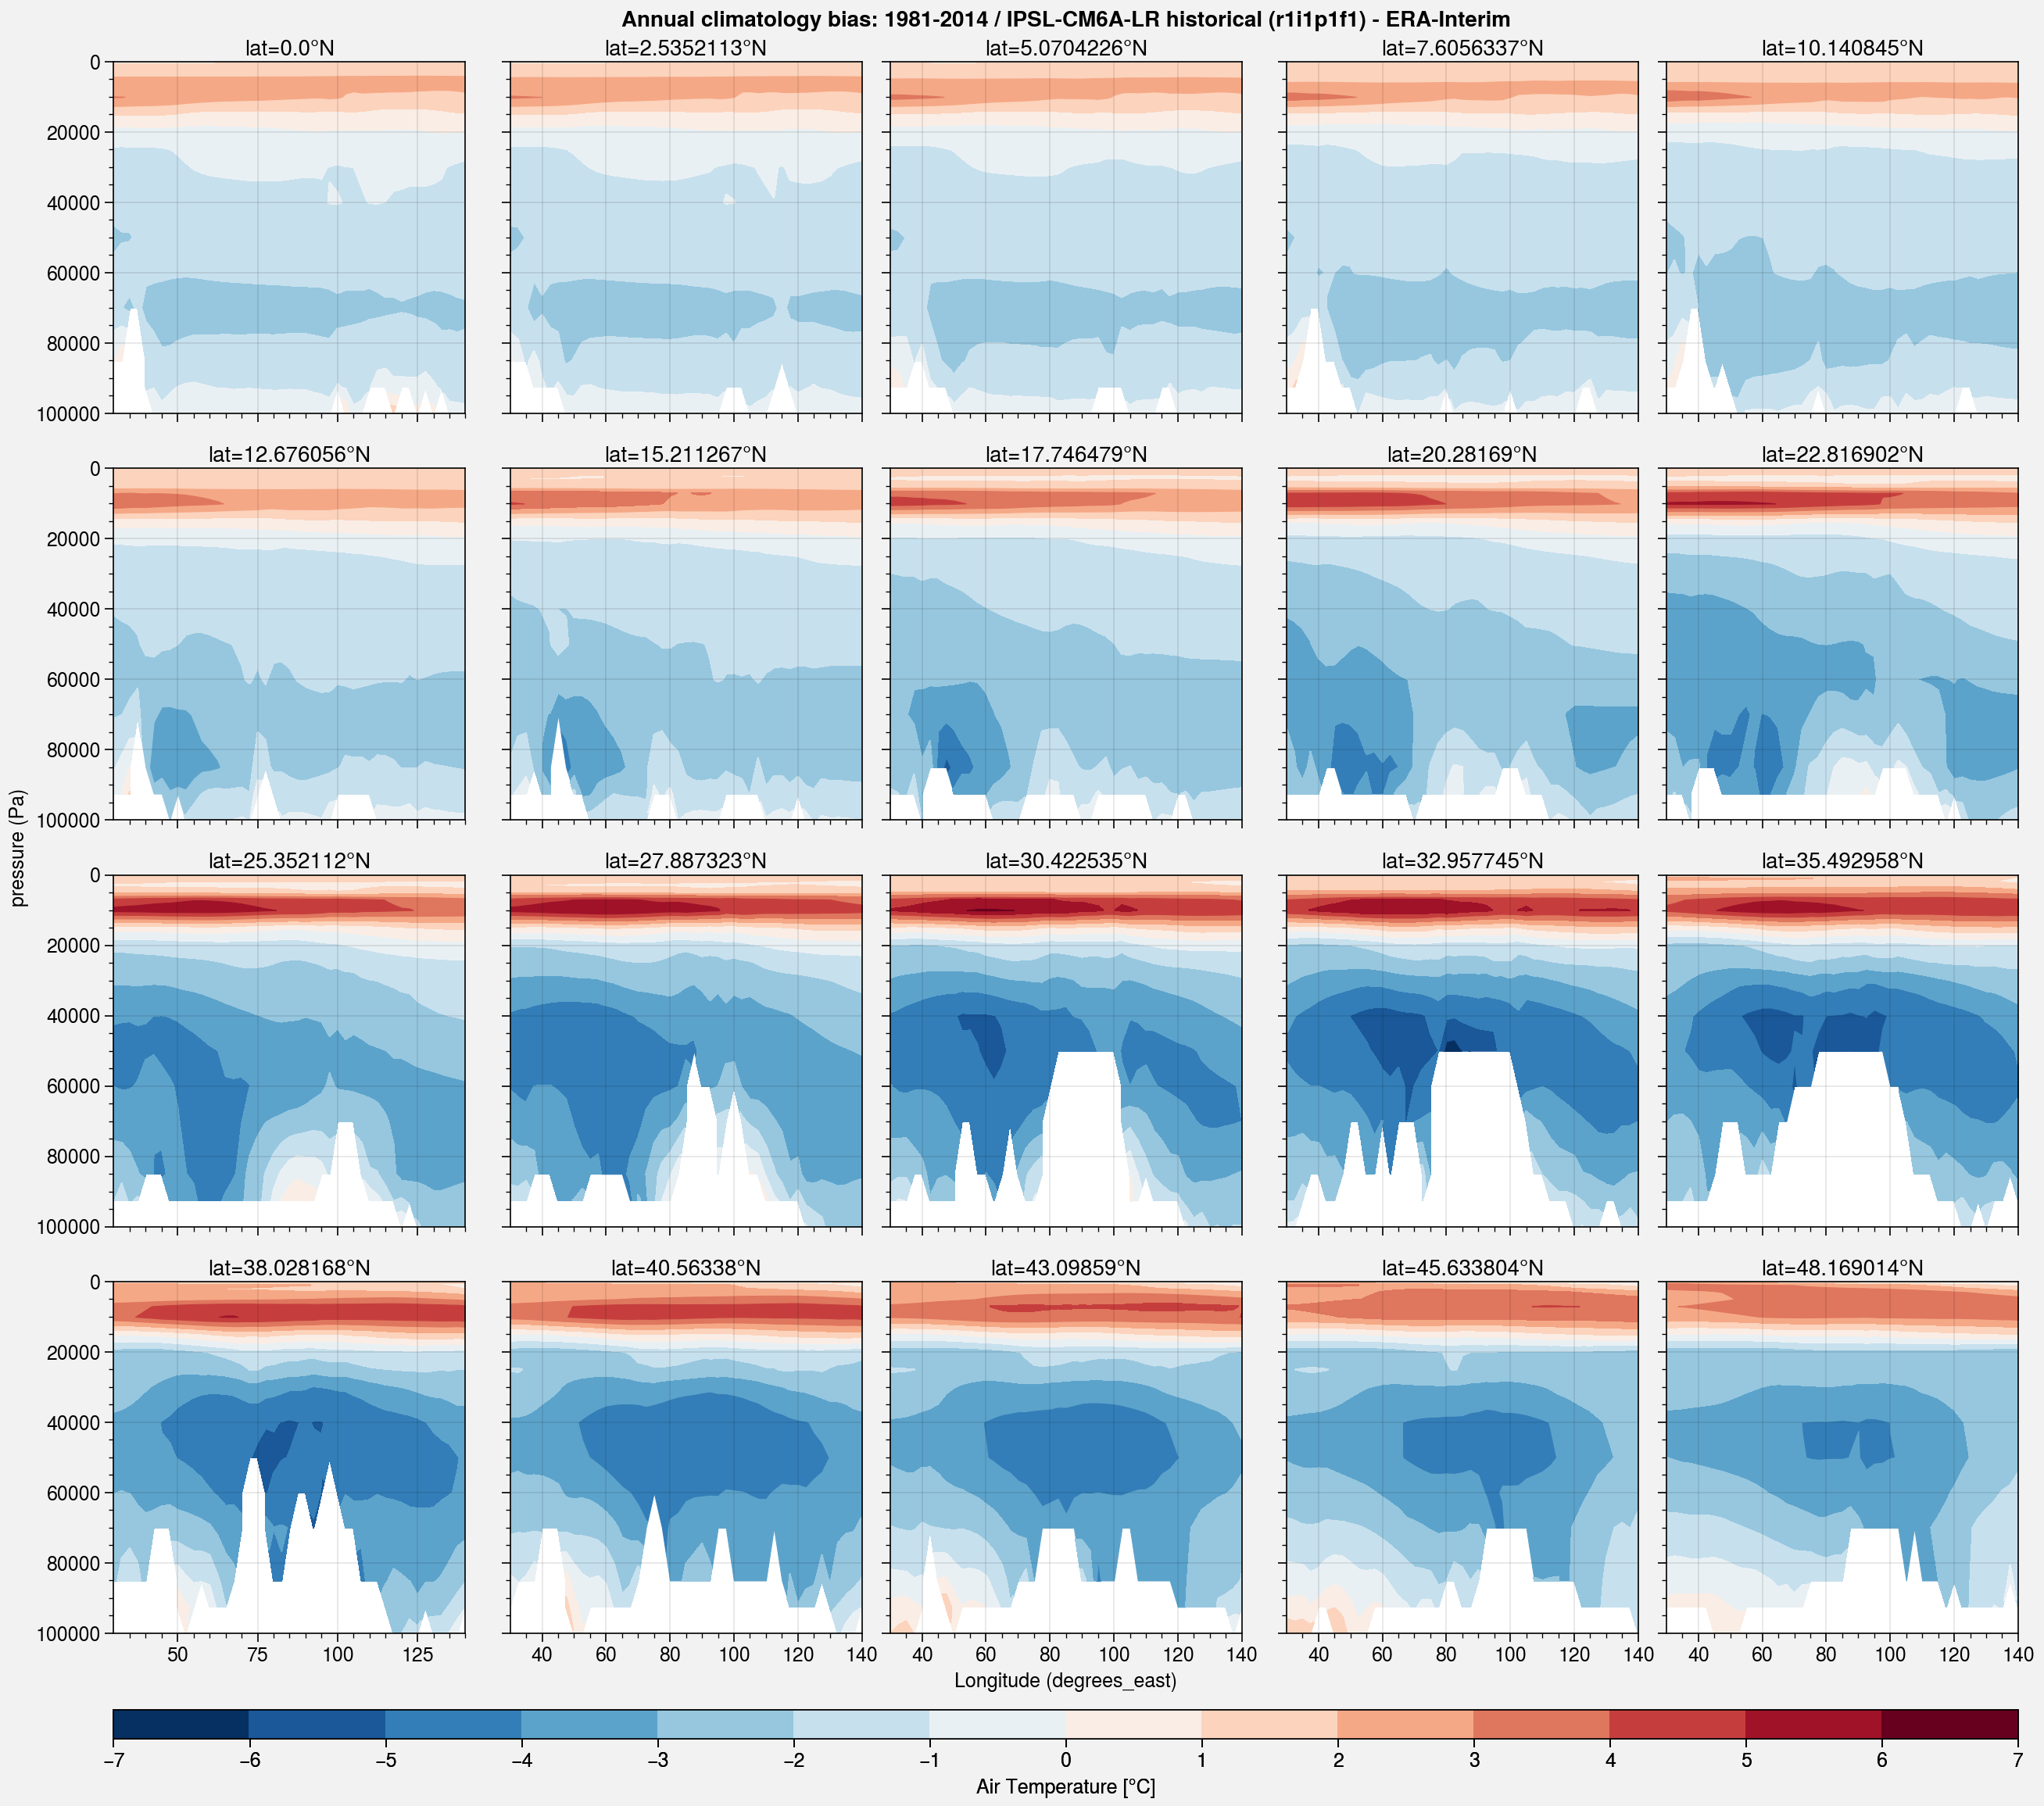

In [59]:
#Check colorbars 
levels = plot.arange(-60,30,1)
extend='both'
cmap='Spectral'

f, axs = plot.subplots(nrows=4, ncols=5)

for i, ax in enumerate(axs):
    m = ax.contourf(ta_bias[:,0:-1:2,:].isel(lat=i), cmap='BuRd', levels=plot.arange(-7,7,1))
    ax.format(ylim=(100000,0), title='lat='+str(ta_bias[:,0:-1:2,:].isel(lat=i).lat.values)+'°N')

f.colorbar(m2, label='Air Temperature [°C]', loc='b')


axs.format(
    suptitle="Annual climatology bias: 1981-2014 / IPSL-CM6A-LR historical (r1i1p1f1) - ERA-Interim"
)

# f.save('img/ta/slices_lat_ta_pcolormesh_ext.png')
# f.save('img/ta/slices_lat_ta_pcolormesh_ext.pdf')